In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection, svm, preprocessing, metrics, ensemble, tree
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

## load  and prepare data

In [3]:
#read in the data with numerical features
data = pd.read_csv('data/transformed_data_num.csv',index_col=0)
data.dropna(inplace=True)

In [4]:
data.head(10)

,outcometype,animaltype,sex,age,year,neutralized,colormix,breedmix,apricot,black,black.1,blue,blue.1,brindle,brown,buff,calico,chocolate,cream,fawn,flame,gold,gray,lilac,liver,lynx,merle,orange,point,red,sable,seal,silver,smoke,tabby,tan,tick,tiger,torbie,tortie,tricolor,white,yellow,affenpinscher,airedale,akita,alaskan,american,anatol,angora,apso,argentino,australian,basenji,basset,bay,beagle,beauceron,belgian,bernard,bernese,bichon,black.2,black.3,bloodhound,blue.2,blue.3,bluetick,bobtail,border,boston,boxer,brittany,bruss,bull,bulldog,bullmastiff,cairn,cane,cardigan,carolina,catahoula,cattle,cavalier,chesa,chihuahua,chinese,chow,coat,coated,cocker,collie,coon,coonhound,corgi,corso,cur,dachshund,dalmatian,dane,doberman,dog,dogo,domestic,dutch,english,eskimo,feist,finnish,flat,fox,french,frise,german,golden,great,greyhound,griffon,hair,harrier,havanese,heeler,highland,himalayan,hound,husky,inu,irish,italian,jack,japanese,kelpie,labrador,lacy,landseer,leonberger,lhasa,longhair,maine,malamute,malinois,maltese,manchester,manx,mastiff,medium,miniature,mountain,mouth,newfoundland,norfolk,norwich,papillon,parson,patterdale,pbgv,pekingese,pembroke,persian,pharaoh,pinsch,pinscher,pit,plott,pointer,pomeranian,poodle,pug,pyrenees,queensland,ragdoll,rat,redbone,retr,retriever,rhod,ridgeback,rottweiler,rough,russell,russian,schipperke,schnauzer,sharpei,sheepdog,shepherd,shetland,shiba,shih,shorthair,siamese,siberian,silky,smooth,snowshoe,soft,span,spaniel,spitz,springer,st,staffordshire,standard,swedish,terr,terrier,tibetan,toy,treeing,tzu,vallhund,vizsla,walker,weimaraner,welsh,west,wheaten,whippet,wire,wirehair,wolfhound,yorkshire,april,august,december,february,january,july,june,march,may,november,october,september,friday,monday,saturday,sunday,thursday,tuesday,wednesday
AnimalID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Return_to_owner,1.0,0.0,0.090683,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Euthanasia,0.0,1.0,0.090683,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.

In [5]:
#prepare data
X = np.array(data.drop('outcometype',axis=1))
Y = np.array(data.outcometype)

x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,train_size=0.7)

## decision tree

In [6]:
#search a good model
tr = tree.DecisionTreeClassifier()

param_dict = {'max_depth':[5], 'criterion':["gini", "entropy"], 'max_features':['auto', None], 
              'splitter':['best', 'random']}

clf = model_selection.GridSearchCV(tr, param_grid = param_dict, n_jobs = -1)

clf.fit(x_train,y_train)

print(clf.best_score_)
print(clf.best_params_)

results = pd.DataFrame(clf.cv_results_)

results

0.6344765941709742
{'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.134107,0.002982,0.013939,0.000782,gini,5,auto,best,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.458610,0.545717,0.528699,0.606865,0.475765,0.523131,0.052838,6
1,0.134386,0.008190,0.013602,0.002226,gini,5,auto,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.599077,0.460340,0.433516,0.482261,0.448932,0.484825,0.059297,7
2,0.807684,0.018674,0.017654,0.001261,gini,5,None,best,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.618114,0.620133,0.627920,0.642054,0.650894,0.631823,0.012714,2
3,0.706865,0.067599,0.018406,0.004184,gini,5,None,random,"{'criterion': 'gini', 'max_depth': 5, 'max_fea...",0.623594,0.616095,0.626478,0.625036,0.635314,0.625303,0.006155,3
4,0.142633,0.012357,0.014174,0.000933,entropy,5,auto,best,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.599942,0.504182,0.490337,0.600231,0.612233,0.561385,0.052728,5
5,0.153285,0.009310,0.017929,0.003506,entropy,5,auto,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.445630,0.500433,0.437843,0.576291,0.431621,0.478364,0.054727,8
6,0.699636,0.009468,0.014239,0.002360,entropy,5,None,best,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.630516,0.622152,0.627055,0.640900,0.651760,0.634477,0.010608,1
7,0.479531,0.123232,0.011452,0.003961,entropy,5,None,random,"{'criterion': 'entropy', 'max_depth': 5, 'max_...",0.619844,0.616095,0.633401,0.622440,0.629833,0.624322,0.006389,4


In [7]:
#training score
clf.score(x_train,y_train)

0.6320526133610246

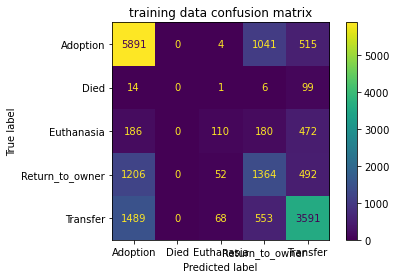

In [8]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_train,y_train,ax=ax)
ax.set_title('training data confusion matrix')
plt.show()

In [9]:
#testing score
clf.score(x_test,y_test)

0.6207267833109017

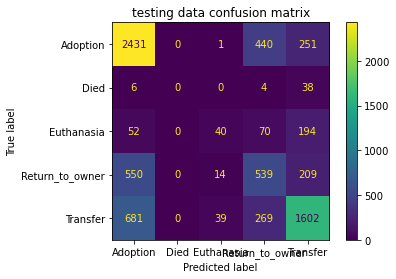

In [10]:
fig,ax = plt.subplots()
metrics.ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,ax=ax)
ax.set_title('testing data confusion matrix')
plt.show()

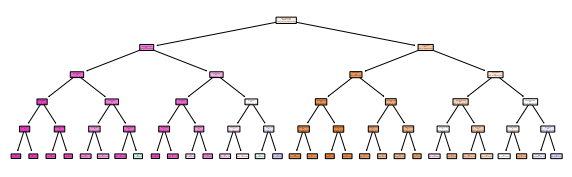

In [16]:
fig = plt.figure(figsize=(10,3))
tree.plot_tree(clf.best_estimator_,feature_names=data.columns[1:] ,rounded=True, filled =True, 
               impurity=False, label='root', class_names=['Adoption', 'Died', 'Euthanasia', 'Return', 'Transfer'])
plt.show()
#fig.savefig('tree.pdf')